In [ ]:
import os
import pandas as pd
import numpy as np
import xarray as xr
import colorcet
import datashader as ds
from xnutrace.tracelog import TraceLog

In [ ]:
tl = TraceLog("../../../build/harness.bundle")

'../../../build/harness.bundle/thread-259.bin' decompressed 597,028 bytes to 425,726,512 bytes


In [ ]:
pcs = tl.based_pcs_for_image(os.getenv("IMG_NAME"))

In [ ]:
pcs.shape

(27392681,)

In [ ]:
idx = np.arange(len(pcs))

In [ ]:
idx.shape

(27392681,)

In [ ]:
raw_points = np.dstack((pcs, idx))[0,:,:]

In [ ]:
raw_points.shape

(27392681, 2)

In [ ]:
df = pd.DataFrame(raw_points, columns=("addr", "time"), copy=False)

In [ ]:
df

,addr,time
0,90336.0,0.0
1,90340.0,1.0
2,90344.0,2.0
3,90348.0,3.0
4,90352.0,4.0
...,...,...
27392676,149420.0,27392676.0
27392677,149424.0,27392677.0
27392678,149428.0,27392678.0
27392679,149432.0,27392679.0


In [ ]:
cvs = ds.Canvas(plot_width=850, plot_height=500)

In [ ]:
agg = cvs.points(df, 'addr', 'time')

In [ ]:
img = ds.tf.shade(agg, cmap=colorcet.fire)

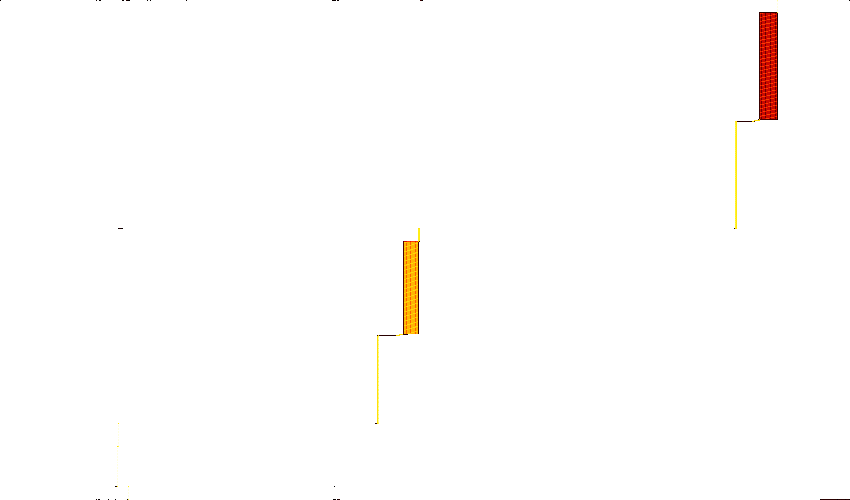

In [ ]:
img

In [ ]:
pil = img.to_pil()

In [ ]:
pil.save("foo.png")